# Neil Shah: CUNY 621 Blog 1
# Keeping Things Normal

This is my first blog post for 621 and I'm trying to use Jupyter Notebook--I know most people use Rpubs--but I'm trying to learn! This post is inspired by my delve into **Python for Finance by Hiplisch**. 

As we know what of the most celebrated and studied distributions in statistics is the **Normal Distribution** 

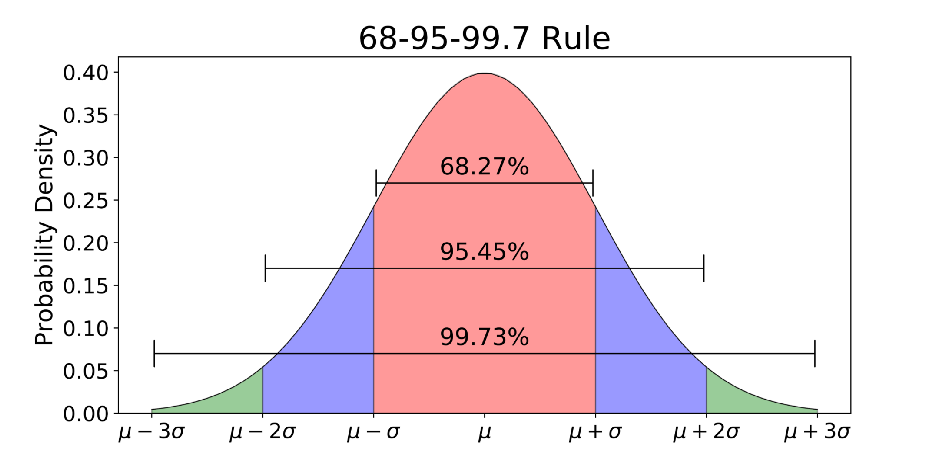
(source: https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2)


There is plenty of [literature](https://en.wikipedia.org/wiki/Normal_distribution) on the Normal distribution but due to it's analytical solution, known parameters and it's link to the Central Limit Theorem, it's the king of distributions. In essence by assuming a distribution is normal simplifies a great deal of analysis for the user and in some cases it's a much needed assumption for analysis--see hypothesis testing or errors in linear regression.

So the question I wanted to explore is how can one check if a distribution is normal and how often are real life data sets normal?


In [56]:
#Import our packages
import statsmodels.api as sm
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

First let's generate some standard normal distributed data (mean=0, standard deviation =1 and we will sample from 4,000) cases

In [50]:
data = norm.rvs(0, 1, size=4000)

Now the simplest and starting point of any analysis could be a visual graph--so let's plot the data and see how it looks!

Text(0.5, 1.0, 'Data')

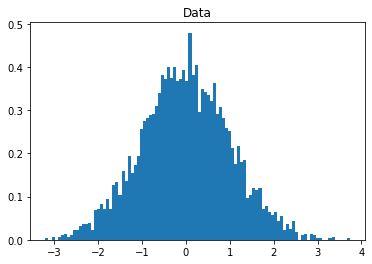

In [51]:
plt.hist(data,bins=100,density=True,label='generated data')
plt.title('Data')

So this looks normal--but let's overlay a normal plot on it just to see 

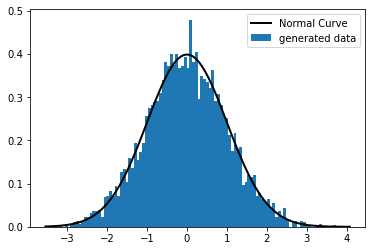

In [52]:
#Original Data
plt.hist(data,bins=100,density=True,label='generated data')
#Normal data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2,label='Normal Curve')
plt.legend(loc='upper right')
plt.show()

Our normal curve fits pretty well--so graphically we can say that this looks nomrally distributed--which makes sense given that we generated it normally!

Another graphical way we learned in 606 was using a QQ plot too see how well the data fits a theoretical normal plot.

Text(0, 0.5, 'Sample quantiles')

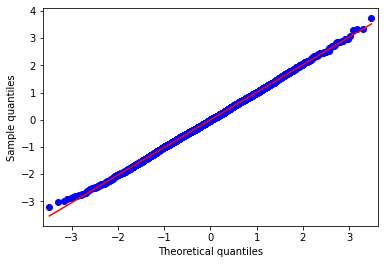

In [53]:
sm.qqplot(data,line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')

Once again the data lies directly on our QQ plot which isn't suprising since we generated it from normal data!

But these tests are all visual--what if we want something robust? Now we are thinking a hypothesis test! While there are many out there we learned in 606 about the [Shapiro Wilk Test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)--which generates a test statistics. Here the null hypothesis is that the sample is from a normal distribution. 

Using this and a standard alpha of .05

In [54]:
shapiro(data)

(0.9995895028114319, 0.5957925319671631)

Here our p value was 0.59 and greater than .05 and thus we fail to reject the null--this data is from a normal distribution, which we knew ahead of time.

So far I have shown how to test for normality--but here comes the big question, is real world data normally Normal?

## Real World Data

I like to deal with price series for trading often--so I uploaded a price series of a certain commodity that I eventually want to model! Remember if it's normally distributed this will make my life easier

In [59]:
#Load Data
df=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/sampledata.csv',header=0,index_col=0,parse_dates=True)
df.head()

,1
Date,
2019-01-04,1.2775
2019-01-07,1.2625
2019-01-08,1.2525
2019-01-09,1.2650
2019-01-10,1.2600


Let's first run our visual checks

Text(0.5, 1.0, 'Histogram of Price')

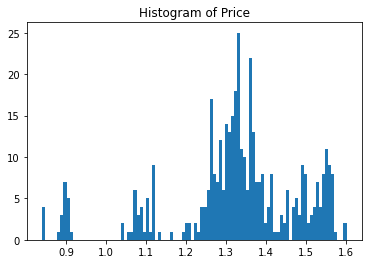

In [64]:
plt.hist(df['1'],bins=100)
plt.title('Histogram of Price')

Eek--that's not so good so far! Does't look normal. Ok let's try the QQ plot


Text(0, 0.5, 'Sample quantiles')

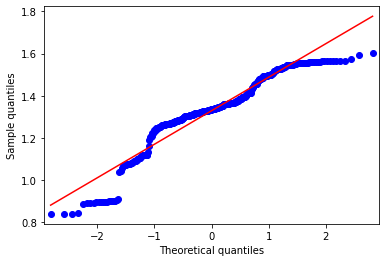

In [65]:
sm.qqplot(df['1'],line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')

Ok...there is definitely some skew and it isn't looking Normal--but lets be robust and check the Shapiro

In [66]:
shapiro(df['1'])

(0.9150748252868652, 1.8223182023709844e-14)

Using a critical value of .05 our P value is much less than it and therefore we REJECT the Null Hypothesis and say this data isnt normally distributed. 

This is probably the case with most finance data--and many real world data sets aren't normally distributed. This post was made to highlight the importance of checking the data for assumptions--had I assumed this data set was normal and did analysis, I could of been in serious trouble!

I read that there are certain ways to transform data and a whole field of non-parametric analysis--maybe next time!